In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Reading the Dataset

In [2]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")

 Features of the dataset: 

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# 1. **Display Top 5 Rows of The Dataset**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. **Check the Last 3 Rows of The Dataset**

In [4]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 3. **Find Shape of Our Dataset (Number of Rows & Number of Columns)**

In [5]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 891
Number of Columns 12


# 4. **Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 5. **Get Overall Statistics About The Dataframe**

In [7]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 6. **Data Filtering**

In [8]:
df[df['Survived']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Details of Person Survived on Titanic

In [9]:
df[(df['Survived']==1) & (df['Sex']=='male')][['Name','Age','PassengerId']]

,Name,Age,PassengerId
17,"Williams, Mr. Charles Eugene",NaN,18
21,"Beesley, Mr. Lawrence",34.0,22
23,"Sloper, Mr. William Thompson",28.0,24
36,"Mamee, Mr. Hanna",NaN,37
55,"Woolner, Mr. Hugh",NaN,56
...,...,...,...
838,"Chip, Mr. Chang",32.0,839
839,"Marechal, Mr. Pierre",NaN,840
857,"Daly, Mr. Peter Denis",51.0,858
869,"Johnson, Master. Harold Theodor",4.0,870


Details of Males Survived on Titanic

# 7. **Check Null Values In The Dataset**

In [10]:
new_df=df.isnull().sum()

Text(0.5, 1.0, 'Count Of NULL Values in the DataSet')

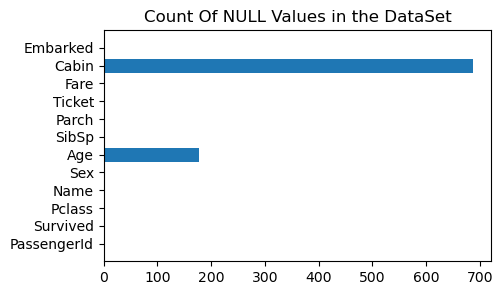

In [11]:
fig,ax=plt.subplots(figsize=(5,3))
ax.barh(new_df.index,new_df.values)
ax.set_title('Count Of NULL Values in the DataSet')

# 8. **Drop the Column**

In [12]:
df.drop('Cabin',axis=1,inplace=True)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

# 9. **Handle Missing Values**

In [14]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
df['Embarked'].fillna('S',inplace=True)

In [16]:
df['Embarked'].isnull().sum()

0

In [17]:
df['Age'].interpolate(method="ffill",inplace=True)

In [18]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 10. **Categorical Data Encoding**

In [20]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [21]:
df['Gender']=df['Sex'].map({'male':1,'female':0})
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1


In [22]:
df.insert(5,'Encoded_Sex',df['Gender'])

In [23]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Encoded_Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,S,1


In [24]:
df.drop('Gender',axis=1,inplace=True)

In [25]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Encoded_Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,S


# **Univariate Analysis**

# 11. **How Many People Survived And How Many Died?**

In [26]:
Survival=df['Survived'].value_counts()
Survival.index=['Died','Survived']

In [27]:
Survival

Died        549
Survived    342
Name: Survived, dtype: int64

In [28]:
died=df['Survived'].value_counts().values[0]
survived=df['Survived'].value_counts().values[1]

In [29]:
print(survived,"people Survived while",died,"people died.")

342 people Survived while 549 people died.


<BarContainer object of 2 artists>

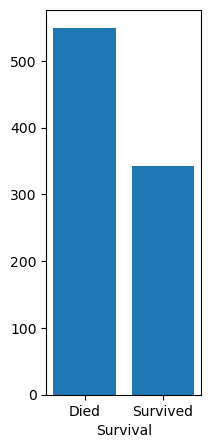

In [30]:
fig,ax=plt.subplots(figsize=(2,5))
ax.set_xlabel('Survival')
ax.bar(Survival.index,Survival.values)

# 12. **How Many Passengers Were In First Class, Second Class, and Third Class?**

In [31]:
x=df['Pclass'].value_counts().index
y=df['Pclass'].value_counts().values

<BarContainer object of 3 artists>

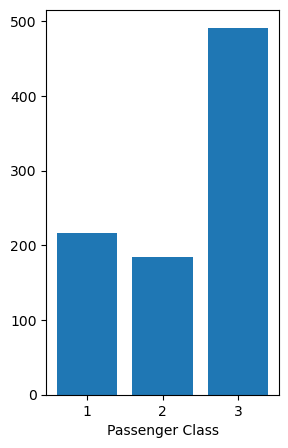

In [32]:
fig,ax=plt.subplots(figsize=(3,5))
ax.set_xlabel('Passenger Class')
ax.bar(x,y)

# 13. **Number of Male And Female Passengers**

In [33]:
Gender=df['Sex'].value_counts()

<BarContainer object of 2 artists>

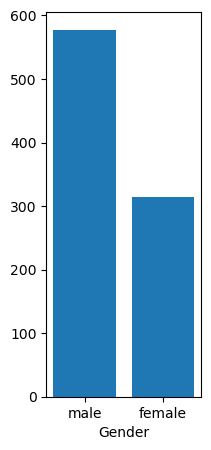

In [34]:
fig,ax=plt.subplots(figsize=(2,5))
ax.set_xlabel('Gender')
ax.bar(Gender.index,Gender.values)

# **Bivariate Analysis**

# 14. **Who Has Better Chance of Survival Male or Female?**

In [35]:
chance=df.groupby('Sex')['Survived'].mean()

<BarContainer object of 2 artists>

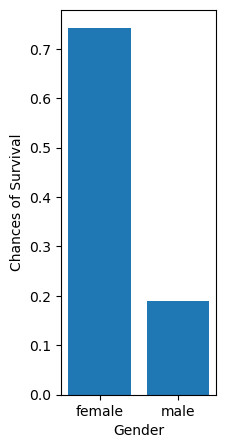

In [36]:
fig,ax=plt.subplots(figsize=(2,5))
ax.set_xlabel('Gender')
ax.set_ylabel('Chances of Survival')
ax.bar(chance.index,chance.values)

Females has more Chances of Survival than Male

# 15. **Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)?**

In [37]:
Class=df.groupby('Pclass')['Survived'].mean()
Class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<BarContainer object of 3 artists>

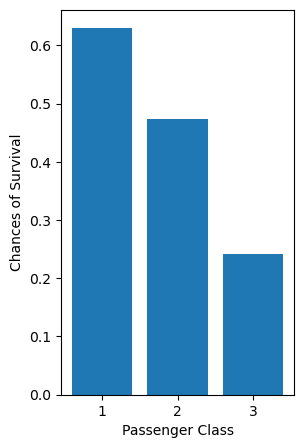

In [38]:
fig,ax=plt.subplots(figsize=(3,5))
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Chances of Survival')
ax.bar(Class.index,Class.values)

Passengers in 1st Class have more chances of Survival than other Classes.

# **Feature Engineering**

Feature Engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. So, these features can be use to increase the performance of machine learning algorithm's.

# Examples

**Determine Person's Family Size**

In [39]:
#for this we use SibSp and Parch Columns and stores in new column named as Family Size
df['Family_Size']=df['SibSp'] + df['Parch']

In [40]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Encoded_Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,S,1


New Column with name Family Size is added to the dataset that signifies the size of person's family excluding himself/herself.

**Determine Fair per Person**

In [41]:
#for this we use Fare and Family Size Columns and stores in new column named as Fare per person.
df['Fare per Person']=df['Fare'] / (df['Family_Size'] + 1)

In [42]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Encoded_Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Fare per Person
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,S,1,3.625


New Column with name Fare per Person is added to the dataset that signifies the Fare per head.